Implementação em Python dos algoritmos de **Busca em Largura** e **Busca em Profundidade** para resolver o problema de rota entre as cidades do mapa abaixo.

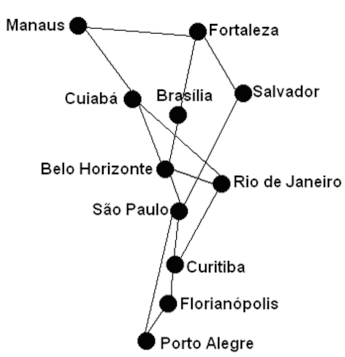

Instalação e importação da biblioteca para desenhar a árvore de busca gerada.

Esta biblioteca não é necessaria para a realização da busca em si.

In [2]:
!pip install treelib
from treelib import Node, Tree

Definição da classe **Estado** que representa os diferentes estados da busca (os nodos da árvore de busca). Neste exemplo cada estado é descrito apenas pelo nome da cidade que ele representa. O atributo pai serve para indentificar a cidade que levou até a cidade atual. Após encontrar a resposta, é por meio deste atributo que se define a rota, partindo do estado final, e buscando o seu pai de forma iterativa até chegar ao estado de origem (raiz da árvore). Embora o algoritmo de busca não processe uma árvore efetivamente, por meio do atributo pai é possível montar a árvore partindo de todos os nodos constantes na fronteira, até atingir a raiz da árvore.



In [3]:
class Estado:
  def __init__(self, cidade, pai):
    self.cidade = cidade
    self.pai = pai

Definição da classe Busca. Esta é a classe base utilizada para derivar as classes específicas de BuscaLargura e BuscaProfundidade.

A variável **visitados**, que é do tipo conjunto (set), armazena os nomes das cidades já visitadas para que o algoritmo de busca não visite-a novamente, quando estiver sendo realizada uma busca que não permite a repetição de estados (busca em grafo).

A variável **árvore** não é utilizada na busca em si, ela apenas armazena os vértices visitados para mostrá-los após encontrar a solução.

O atributo **rotas** armazena o grafo em si, representado por meio de uma lista de adjacências armazenada em um dicionário.

In [4]:
class Busca:

  def __init__(self):
    self.rotas = {'Porto Alegre': ['Florianópolis','São Paulo'],
                  'Florianópolis': ['Curitiba','Porto Alegre'],
                  'Curitiba': ['Florianópolis','São Paulo','Rio de Janeiro'],
                  'São Paulo':['Belo Horizonte', 'Curitiba', 'Porto Alegre', 'Salvador'],
                  'Rio de Janeiro':['Belo Horizonte','Cuiabá', 'Curitiba'],
                  'Belo Horizonte': ['Brasília','Cuiabá', 'São Paulo','Rio de Janeiro'],
                  'Brasília': ['Belo Horizonte','Fortaleza'],
                  'Salvador': ['Fortaleza','São Paulo'],
                  'Cuiabá': ['Belo Horizonte','Manaus','Rio de Janeiro'],
                  'Fortaleza': ['Manaus','Salvador','Brasília'],
                  'Manaus': ['Cuiabá','Fortaleza']
  }

# Implementação do método que realiza a busca efetivamente. Este método recebe como parâmetros as cidades de origem e de destino,
# a estrura de dados que armazena a fronteira (os nós ainda não expandidos), o conjunto que armazena os nomes das cidades já visitas
# e o objeto que vai armazenar a árvore gerada
  def busca(self, origem, destino, fronteira):
    atual = Estado(origem, None)
    fronteira.put(atual)
    visitados = set()
    visitados.add(atual.cidade)
    qtdVisitados = 1
    qtdExpandidos = 0
    ##### As próximas linhas são desnecessárias caso não se deseje ver a árvore no final da execução
    arvore = Tree()
    arvore.create_node(atual.cidade, atual)
    #####
    resultado = None
    while not fronteira.empty() and resultado == None:
      atual = fronteira.get()
      qtdExpandidos += 1
      resultado, fronteira, visitados, qtdVisitados, arvore = self.geraFilhos(atual, destino, fronteira, visitados, qtdVisitados, arvore)
    return resultado, qtdVisitados, qtdExpandidos, arvore

#Implementação do método geraFilhos. Este método recebe um nodo da árvore como parâmetro e gera os filhos possíveis consultando a lista de adjacências.
#Ele também recebe como parâmetro a cidade de destino para saber se chegou ao resultado ou não.
  def geraFilhos(self, atual,  destino, fronteira, visitados, qtdVisitados, arvore):
    cidades = self.rotas.get(atual.cidade)
    for c in cidades:
      if (c==destino):
        qtdVisitados += 1
        novo = Estado(c, atual)
        visitados.add(c)
        # Esta linha é desnecessária caso não se deseje ver a árvore no final da execução
        arvore.create_node(c, novo, parent=atual)
        return novo, fronteira, visitados, qtdVisitados, arvore
      else:
        # Se os dois ifs abaixo estiverem comentados, a busca vai gerar estados repetidos na árvore, inclusive filhos que serão iguais ao pai de um nó (avô).
        # Se o primeiro if estiver comentado e o segundo if não a busca não vai gerar nenhum estado repetido no árvore
        # Se o segundo if estiver comentando e o primeiro não, a busca vai gerar estados repetidos na árvore, mas não gerará filhos iguais ao avô.

        #if atual.pai == None or c != atual.pai.cidade:
        if c not in visitados:
          qtdVisitados += 1
          novo = Estado(c, atual)
          fronteira.put(novo)
          visitados.add(c)
          # Esta linha é desnecessária caso não se deseje ver a árvore no final da execução
          arvore.create_node(c, novo, parent=atual)

    return None, fronteira, visitados, qtdVisitados, arvore

#Implementação do método que apresenta os resultados da busca. O resultado está na ordem inversa pois ele é descoberto retornando do estado final até o estado inicial,
#consultando o atributo pai da classe Estado. Para apresentá-lo na ordem correta, basta inserir os estados em uma lista,
#em vez de mostrá-los diretamente e depois mostrar a lista na ordem inversa.
  def mostraResultado(self, resultado, qtdVisitados, qtdExpandidos, arvore):
    if (resultado==None):
      print('Solução não encontrada.')
    else:
      print('***Rota encontrada***')
      while (resultado != None):
        print(resultado.cidade)
        resultado = resultado.pai
    print('Estados visitados: ',qtdVisitados)
    print('Estados expandidos: ',qtdExpandidos)
    print('****Árvore gerada****')
    arvore.show()


Aqui termina a classe **Busca** e são definidas as classes derivadas que implementam cada um dos diferentes algoritmos de busca.

Definição da classe **BuscaLargura**. Os métodos de busca e geração dos filhos são os mesmos da classe base. O fato de implementar a fronteira como uma **Fila** é o que caracteriza a **Busca em Largura**.

In [5]:
# Importação da classe Queue que implementa a Fila usada para armazenar a fronteira
from queue import Queue

class BuscaLargura(Busca):

  def realizaBusca(self, origem, destino):
    fronteira = Queue()
    resultado, qtdVisitados, qtdExpandidos, arvore = self.busca(origem, destino, fronteira)
    self.mostraResultado(resultado, qtdVisitados, qtdExpandidos, arvore)

Para executar a busca em largura basta instanciar um objeto da classe **BuscaLargura**, definir as cidades de origem e destino e fazer a chamada do método conforme exemplo abaixo.

In [6]:
algbusca = BuscaLargura()
algbusca.realizaBusca('Porto Alegre','Manaus')

***Rota encontrada***
Manaus
Cuiabá
Belo Horizonte
São Paulo
Porto Alegre
Estados visitados:  11
Estados expandidos:  9
****Árvore gerada****
Porto Alegre
├── Florianópolis
│   └── Curitiba
│       └── Rio de Janeiro
└── São Paulo
    ├── Belo Horizonte
    │   ├── Brasília
    │   └── Cuiabá
    │       └── Manaus
    └── Salvador
        └── Fortaleza



Definição da classe **BuscaProfundidade**. Os métodos de busca e geração dos filhos são os mesmos da classe base. O fato de implementar a fronteira como uma **Pilha** é o que caracteriza a **Busca em Profundidade**.

In [7]:
# Importação da classe LifoQueue que implementa a Pilha usada para armazenar a fronteira
from queue import LifoQueue

class BuscaProfundidade(Busca):

  def realizaBusca(self, origem, destino):
    fronteira = LifoQueue()
    resultado, qtdVisitados, qtdExpandidos, arvore = self.busca(origem, destino, fronteira)
    self.mostraResultado(resultado, qtdVisitados, qtdExpandidos, arvore)

Para executar a busca em profundidade basta instanciar um objeto da classe **BuscaProfundidade**, definir as cidades de origem e destino e fazer a chamada do método conforme exemplo abaixo.

In [8]:
algbusca = BuscaProfundidade()
algbusca.realizaBusca('Porto Alegre','Manaus')

***Rota encontrada***
Manaus
Fortaleza
Salvador
São Paulo
Porto Alegre
Estados visitados:  8
Estados expandidos:  4
****Árvore gerada****
Porto Alegre
├── Florianópolis
└── São Paulo
    ├── Belo Horizonte
    ├── Curitiba
    └── Salvador
        └── Fortaleza
            └── Manaus

